# Carga de datos, librerías y funciones

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd
import pickle
import re
import string
import spacy

from string import digits
from sklearn.model_selection import train_test_split

sp = spacy.load('en_core_web_sm')

In [28]:
def cut_text_len(list):
    temp = []
    temp_coma = []
    temp_list = []

    for sentence in list: temp.extend(sentence.split('.'))
    for sentence in temp: temp_coma.extend(sentence.split(','))
    temp_coma = [sentence for sentence in temp_coma if len(sentence.split()) > 2]

    for sentence in temp_coma:
        text = sentence.split()
        new_sentence = ''
        len_sentence = 0
        mess = len(text)
        while mess > 0:
            new_sentence += text[0] + ' '
            text.pop(0)
            len_sentence += 1
            mess = len(text)
            if len_sentence == 15:            
                temp_list.append(new_sentence)
                new_sentence = ''
                len_sentence = 0
                mess = len(text)
            elif mess == 0:
                mess = len(new_sentence.split())
                if mess <= 2:
                    break
                temp_list.append(new_sentence)
                break
    return(temp_list)

def clean_text(list):   
    text_clean = []
    for text in list:
        text = text.lower()
        new_text = ''
        for word in text.split():
            for key in contractions:
                if word == key:
                    word = contractions[key]
            new_text += word + ' '
        text = re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', new_text) 
        text = re.sub(patron_web, '', text)
        table = str.maketrans(' ', ' ', string.punctuation)
        stripped = [word.translate(table) for word in text]
        text = ''.join(stripped)
        table = str.maketrans('', '', digits)
        newtext = text.translate(table)
        newtext = re.sub("\'", '', newtext)
        text_clean.append(newtext)

    return(text_clean)

# Fuente: https://kgptalkie.com/3664-2/
# Lista de contracciones en inglés extraída de "NLP: End to End Text Processing for Beginners" (., Roshan)

contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"aint": "am not",
"arent": "are not",
"cant": "can not",
"cantve": "cannot have",
"cause": "because",
"couldve": "could have",
"couldnt": "could not",
"couldntve": "could not have",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hadntve": "had not have",
"hasnt": "has not",
"havent": "have not",
"hed": "he would",
"hedve": "he would have",
"hell": "he will",
"hellve": "he will have",
"hes": "he is",
"howd": "how did",
"howdy": "how do you",
"howll": "how will",
"hows": "how does",
"id": "i would",
"idve": "i would have",
"ill": "i will",
"illve": "i will have",
"im": "i am",
"ive": "i have",
"isnt": "is not",
"itd": "it would",
"itdve": "it would have",
"itll": "it will",
"itllve": "it will have",
"its": "it is",
"lets": "let us",
"maam": "madam",
"maynt": "may not",
"mightve": "might have",
"mightnt": "might not",
"mightntve": "might not have",
"mustve": "must have",
"mustnt": "must not",
"mustntve": "must not have",
"neednt": "need not",
"needntve": "need not have",
"oclock": "of the clock",
"oughtnt": "ought not",
"oughtntve": "ought not have",
"shant": "shall not",
"shant": "shall not",
"shantve": "shall not have",
"shed": "she would",
"shedve": "she would have",
"shell": "she will",
"shellve": "she will have",
"shes": "she is",
"shouldve": "should have",
"shouldnt": "should not",
"shouldntve": "should not have",
"sove": "so have",
"sos": "so is",
"thatd": "that would",
"thatdve": "that would have",
"thats": "that is",
"thered": "there would",
"theredve": "there would have",
"theres": "there is",
"theyd": "they would",
"theydve": "they would have",
"theyll": "they will",
"theyllve": "they will have",
"theyre": "they are",
"theyve": "they have",
"tove": "to have",
"wasnt": "was not", 
"u": " you  ",
"ur": "your", 
"n": "and", 
"friends": "",
"friend":"",
"people":"",
"girl":"",
"girlfriend": "",
"grl":"",
"nt": "not",
"gf": "", 
"cuttersuicidal": "suicidal", 
"idk": "i do not know", 
"theripist": "therapist",
"s": "is",
"mt": "",
"cuttersuicidal": "cutter suicidal"
}

patron_web = r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'

def duplicated(list): 
    temp = []
    for sentence in list:
        new_sentence = sentence.split() 
        new_sentece_join = ' '.join(new_sentence)
        temp.append(new_sentece_join)
    return(temp)

def text_to_spacy(list): 
    temp = []
    for sentence in list:
        new_sentence = ''
        for word in sp(str(sentence)):
            new_sentence += word.lemma_ + ' '
        temp.append(new_sentence.lower())
    return(temp)

# Preparación de la data

In [3]:
df = pickle.load(open("./data/df.p", "rb" ))
df.sample(10)

,text,label,label_bi,index
768,kill themselves try and find comfort with i be...,flagged,1,245
256,listen to girlfriend problem,not_flagged,0,2
57,back better telling story thoughts others help...,not_flagged,0,-151
782,look drive light lack support family hospital ...,flagged,1,109
690,grandmother go severe alcoholism shortly diffi...,flagged,1,-134
571,campsite hang share as the tunnel lack of so,flagged,1,-311
134,fight someone see many youre going help go thr...,not_flagged,0,-421
753,i understand the struggle and have a few perso...,flagged,1,-633
783,look simply the throughout and talk to make sure,flagged,1,150
550,basically treat other human even stranger with...,flagged,1,-608


In [4]:
# Creación de listas con las cadenas de textos y etiquetas

sentences = df['text'].to_list()
labels = df['label_bi'].to_list()
labels[:5]

[1, 0, 0, 1, 0]

In [5]:
# Carga y creación del Tokenizer y entrenamiento del diccionario de palabras y números que serán 
## codificados para su posterior entrenamiento

token = Tokenizer()
token.fit_on_texts(sentences)
encoded_text = token.texts_to_sequences(sentences)

In [25]:
embedding_dim = 100
vec_size = 100
max_length = 16
padding_type= 'pre'
trunc_type = 'pre'
word_index = token.word_index
vocab_size = len(token.word_index) + 1

In [7]:
# Preparación de la variable predictora con el diccionario creado con los términos tokenizados

X = pad_sequences(encoded_text, maxlen=max_length, padding=padding_type)
print(X)


[[  0   0   0 ... 273   4  38]
 [  0   0   0 ... 404  18   5]
 [  0   0   0 ... 456 351 168]
 ...
 [  0   0   0 ...   7 136  80]
 [  0   0   0 ...   5 309   3]
 [  0   0   0 ... 568  42  46]]


In [8]:
#Conocer la dimensión de la variable
X.shape

(1008, 16)

In [9]:
glove_vectors = {}

file = open('./data/glove.6B.100d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0] #guardar el valor del vector. 
    vectors = np.asarray(values[1: ])
    glove_vectors[word] = vectors #guardar la representación en array del vector en el diccionario

file.close()

In [10]:
# Representación en vector del término 'you'
glove_vectors.get('you').shape

(100,)

In [11]:
# Tamaño del diccionario
len(glove_vectors)

400000

In [13]:
# Creación de una matriz del tamaño del vocabulario con 100 dimensiones 

word_vector_matrix = np.zeros((vocab_size, 100))

for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
    else:
        pass

# Preparación de la data y entrenamiento


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.3, stratify = labels)

In [15]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')> 0.85):
      print("\n Entrenamiento cancelado. Se alcanzó el 85% de precisión en el set de validación")
      self.model.stop_training = True

callbacks = myCallback()

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
num_epochs = 50
history = model.fit(X_train, y_train,  epochs = num_epochs, validation_data = (X_test, y_test), callbacks = [callbacks])

Epoch 1/50
23/23 [==============================] - 4s 30ms/step - loss: 0.6700 - accuracy: 0.5830 - val_loss: 0.6162 - val_accuracy: 0.6964
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.5746 - accuracy: 0.7106 - val_loss: 0.4969 - val_accuracy: 0.7954
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4864 - accuracy: 0.7574 - val_loss: 0.4615 - val_accuracy: 0.8053
Epoch 4/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4560 - accuracy: 0.7915 - val_loss: 0.4927 - val_accuracy: 0.7789
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4537 - accuracy: 0.7957 - val_loss: 0.4896 - val_accuracy: 0.7591
Epoch 6/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4888 - accuracy: 0.7631 - val_loss: 0.4532 - val_accuracy: 0.7954
Epoch 7/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4185 - accuracy: 0.7929 - val_loss: 0.4172 - val_accuracy: 0.8020
Epoch 8/50
23/23 [

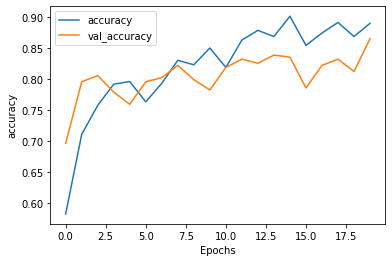

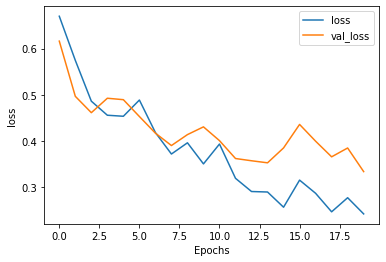

In [20]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Ejemplo #1

In [32]:
new_sentences = data = ["I've some anxiety and some days want to die", 
                        "I help her with her depression",
                        "I'm very sad and depressed today. want to finish it ", 
                        "Some of my friends are suicidal", 
                        "I am happy and joyful "]

In [33]:
new_sentences = cut_text_len(new_sentences)
new_sentences = clean_text(new_sentences)
new_sentences = text_to_spacy(new_sentences)
new_sentences = duplicated(new_sentences)

In [34]:
sequences = token.texts_to_sequences(new_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
total = model.predict(padded)

In [35]:
i = 0
for sentence in new_sentences: 
    print(sentence , ':',  str(float(total[i])))
    i += 1

i have some anxiety and some day want to die : 0.7377107739448547
i help she with her depression : 0.962130069732666
i be very sad and depressed today : 0.04884207248687744
want to finish it : 0.635036289691925
some of my be suicidal : 0.2717679738998413
i be happy and joyful : 0.34535151720046997


# Ejemplo #2

In [36]:

new_sentences = ["my name is andie. i am 16 years old. my life is too messed up for fixing. i have been through a lot. i think it's my time to go. there's no other way . i will not be stating my method because i don't want to be copied. i love you, stranger, please live a better life than me."]

In [38]:
new_sentences = cut_text_len(new_sentences)
new_sentences = clean_text(new_sentences)
new_sentences = text_to_spacy(new_sentences)
new_sentences = duplicated(new_sentences)
sequences = token.texts_to_sequences(new_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
total = model.predict(padded)
i = 0
for sentence in new_sentences: 
    print(sentence , ':',  str(float(total[i])))
    i += 1

my name be andie : 0.40486252307891846
i be year old : 0.4949590563774109
my life be too mess up for fix : 0.3289406895637512
i have be through a lot : 0.06824198365211487
i think it be my time to go : 0.07404187321662903
there be no other way : 0.4884796142578125
i will not be state my method because i do not want to be copy : 0.2729380130767822
i love you : 0.2646474242210388
please live a well life than i : 0.6601837873458862


# Ejemplo #3

In [39]:
new_sentences = ["Can someone explain to me how actively looking for help is one of the loneliest experiences someone can have? Not only am I miserable because I'm sick, but then I also have to listen to these people who are supposed to help me that I have to want to get better or it won't work. Now, I grew up evangelical (not practicing, agnostic, forever put off by religion) and I sure as hell know that expression. What if I don't believe in getting better. What if a big part of me just wants to decay. What if I dragged myself to your office with the last bit of strength in my body. If it were for me, I'd just lie down and die. Deep down, I don't want to get better, I want a do over. Everything is fucked. There's no ladder out of this hole, I only have a shovel and I'm going to dig myself a grave."]

In [40]:
new_sentences = cut_text_len(new_sentences)
new_sentences = clean_text(new_sentences)
new_sentences = text_to_spacy(new_sentences)
new_sentences = duplicated(new_sentences)
sequences = token.texts_to_sequences(new_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
total = model.predict(padded)
i = 0
for sentence in new_sentences: 
    print(sentence , ':',  str(float(total[i])))
    i += 1

can someone explain to i how actively look for help be one of the lonely : 0.11179134249687195
experience someone can have not only be i miserable because i be sick : 0.3631255626678467
but then i also have to listen to these who be suppose to help : 0.4550795555114746
i that i have to want to get well or it wo nt work : 0.22590255737304688
i grow up evangelical not practice : 0.2179722785949707
forever put off by religion and i sure as he will know that expression : 0.4823320508003235
what if i do not believe in get well : 0.03411459922790527
what if a big part of i just want to decay : 0.055151283740997314
what if i drag myself to your office with the last bit of strength in : 0.11386984586715698
if it be for i : 0.7855674624443054
i would just lie down and die : 0.4909425675868988
i do not want to get well : 0.12742862105369568
i want a do over : 0.06630599498748779
everything be fuck : 0.5557295680046082
there be no ladder out of this hole : 0.5741317868232727
i only have a shovel 